In [84]:
# import the necessary packages
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
from imutils.object_detection import non_max_suppression
from google.colab.patches import cv2_imshow
import numpy as np
import argparse
import imutils
import cv2
import time
import math
import os

In [ ]:
path_modelo = './frozen_east_text_detection.pb'

# load the pre-trained EAST text detector
print("[INFO] loading EAST text detector...")
net = cv2.dnn.readNet(path_modelo)

[INFO] loading EAST text detector...


In [123]:
def detec(image, indexFor):

  # image = cv2.imread('./img.jpg')
  # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # blurred = cv2.GaussianBlur(gray, (5, 5), 0)
  # image = cv2.Canny(blurred, 100, 150)

  width = 320
  height = 320

  # load the input image and grab the image dimensions
  orig = image.copy()
  (H, W) = image.shape[:2]

  # set the new width and height and then determine the ratio in change
  # for both the width and height
  (newW, newH) = (width, height)
  rW = W / float(newW)
  rH = H / float(newH)

  # resize the image and grab the new image dimensions
  image = cv2.resize(image, (newW, newH))
  (H, W) = image.shape[:2]

  layerNames = [
    "feature_fusion/Conv_7/Sigmoid",
    "feature_fusion/concat_3"]

  # construct a blob from the image and then perform a forward pass of
  # the model to obtain the two output layer sets
  blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
    (123.68, 116.78, 103.94), swapRB=True, crop=False)
  start = time.time()
  net.setInput(blob)
  (scores, geometry) = net.forward(layerNames)
  end = time.time()

  # show timing information on text prediction
  print("[INFO] text detection took {:.6f} seconds".format(end - start))

  # grab the number of rows and columns from the scores volume, then
  # initialize our set of bounding box rectangles and corresponding
  # confidence scores
  (numRows, numCols) = scores.shape[2:4]
  rects = []
  confidences = []


  # loop over the number of rows
  for y in range(0, numRows):
    # extract the scores (probabilities), followed by the geometrical
    # data used to derive potential bounding box coordinates that
    # surround text
    scoresData = scores[0, 0, y]
    xData0 = geometry[0, 0, y]
    xData1 = geometry[0, 1, y]
    xData2 = geometry[0, 2, y]
    xData3 = geometry[0, 3, y]
    anglesData = geometry[0, 4, y]

    # loop over the number of columns
    for x in range(0, numCols):
      # if our score does not have sufficient probability, ignore it
      #if scoresData[x] < args["min_confidence"]:
      if scoresData[x] < 0.3:
        continue

      # compute the offset factor as our resulting feature maps will
      # be 4x smaller than the input image
      (offsetX, offsetY) = (x * 4.0, y * 4.0)

      # extract the rotation angle for the prediction and then
      # compute the sin and cosine
      angle = anglesData[x]
      cos = np.cos(angle)
      sin = np.sin(angle)

      # use the geometry volume to derive the width and height of
      # the bounding box
      h = xData0[x] + xData2[x]
      w = xData1[x] + xData3[x]

      # compute both the starting and ending (x, y)-coordinates for
      # the text prediction bounding box
      endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
      endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
      startX = int(endX - w)
      startY = int(endY - h)

      # add the bounding box coordinates and probability score to
      # our respective lists
      rects.append((startX, startY, endX, endY))
      confidences.append(scoresData[x])

  # apply non-maxima suppression to suppress weak, overlapping bounding
  # boxes
  boxes = non_max_suppression(np.array(rects), probs=confidences)

  # Definir as coordenadas do canto inferior esquerdo do quadrante
  x_ass = 0  # Coordenada x do canto inferior esquerdo
  y_ass = height  # Coordenada y do canto inferior esquerdo
  width_ass = width // 3  # Largura do quadrante
  height_ass = (height // 1.1)   # Altura do quadrante (quanto maior o divisor, maior a altura. // 4 = altura inteira)

  # loop over the bounding boxes
  imprimir = False
  for (startX, startY, endX, endY) in boxes:
    # Verificando se a caixa está dentro do esperado
    if (startX >= x_ass and startY <= y_ass and endX <= width_ass and endY >= height_ass):
      cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
      imprimir = True

  if imprimir:
    # draw the bounding box on the image
    print("Imprimi a iteração ", indexFor)
    cv2.imwrite("img_dhr_"+str(indexFor+".jpg", image))


In [127]:
image = cv2.imread('./img.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

for i in range(50, 500, 20):
	# Vale tentar aumentar o contraste tbm
	blurred = cv2.GaussianBlur(gray, (9, 9), 0)
	edged = cv2.Canny(blurred, i, i+(i//4)) # pesquisar uma boa proporcao entres os 2 parametros

	cv2.imwrite('quick.jpg', edged)
	img = cv2.imread('quick.jpg')
	detec(img, i)
	os.remove('./quick.jpg')


[INFO] text detection took 0.185591 seconds
[INFO] text detection took 0.191520 seconds
[INFO] text detection took 0.195657 seconds
[INFO] text detection took 0.192313 seconds
[INFO] text detection took 0.186212 seconds
[INFO] text detection took 0.180766 seconds
[INFO] text detection took 0.183488 seconds
[INFO] text detection took 0.191018 seconds
[INFO] text detection took 0.201333 seconds
[INFO] text detection took 0.183649 seconds
[INFO] text detection took 0.191425 seconds
[INFO] text detection took 0.176449 seconds
[INFO] text detection took 0.182346 seconds
[INFO] text detection took 0.197761 seconds
[INFO] text detection took 0.182847 seconds
[INFO] text detection took 0.197680 seconds
[INFO] text detection took 0.185277 seconds
[INFO] text detection took 0.186023 seconds
[INFO] text detection took 0.187983 seconds
[INFO] text detection took 0.179447 seconds
[INFO] text detection took 0.193994 seconds
[INFO] text detection took 0.177033 seconds
[INFO] text detection took 0.191

In [82]:
detec()

[INFO] text detection took 0.259847 seconds


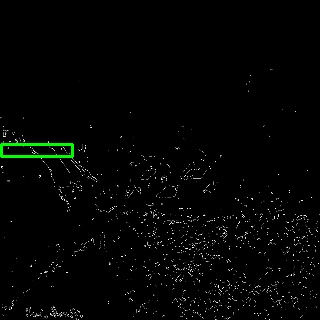

In [133]:
image = cv2.imread('./img_dhr_210.jpg')

cv2_imshow(image)